In [1]:
%matplotlib inline
import nengo.spa as spa
import numpy as np
import matplotlib.pyplot as plt

First, here's the SPA power function:

In [2]:
def power(s, e):
    x = np.fft.ifft(np.fft.fft(s.v) ** e).real
    return spa.SemanticPointer(data=x)


Here are two helper functions for computing the dot product over space, and for plotting the results

In [39]:
def spatial_dot(v, X, Y, Z, xs, ys, transform=1):
    vs = np.zeros((len(ys),len(xs)))
    for i,x in enumerate(xs):
        for j, y in enumerate(ys):
            
            # convert from cartesian to hex axial coordinates
            hx = 2/3 * y
            hy = (np.sqrt(3)/3 * x - y/3 )
            hz = -(np.sqrt(3)/3 * x + y/3 )
            
            #hx = x
            #hy=y
            #hz = np.linalg.norm([x, y])
                        
            t = power(X, hx)*power(Y,hy)*power(Z, hz)*transform
            vs[j,i] = np.dot(v.v, t.v)
    return vs

def spatial_plot(vs, vmax=1, vmin=-1, colorbar=True):
    vs = vs[::-1, :]
    plt.imshow(vs, interpolation='none', extent=(xs[0],xs[-1],ys[0],ys[-1]), vmax=vmax, vmin=vmin, cmap='plasma')
    if colorbar:
        plt.colorbar()
        

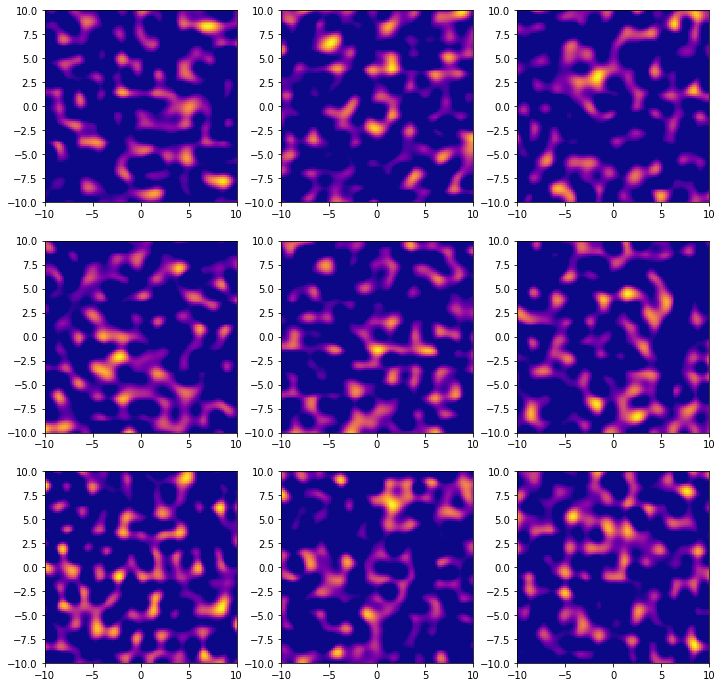

In [41]:
D = 256
X = spa.SemanticPointer(D)
X.make_unitary()
Y = spa.SemanticPointer(D)
Y.make_unitary()
Z = spa.SemanticPointer(D)
Z.make_unitary()

W = 10
Q = 100
xs = np.linspace(-W, W, Q)
ys = np.linspace(-W, W, Q)


def relu(x):
    return np.maximum(x, 0)

M = 3
plt.figure(figsize=(12,12))
for i in range(M):
    for j in range(M):
        plt.subplot(M, M, i*M+j+1)
        spatial_plot(relu(spatial_dot(spa.SemanticPointer(D), X, Y, Z, xs, ys)), vmin=None, vmax=None, colorbar=False)